# **Capstone Project**

## Leading Indicators
| File Name | Type | Use |
|-----------|------|-----|
| `Consumer_Confidence_Index.csv` | Leading | Feature |
| `Business_Confidence_Index.csv` | Leading | Feature |
| `Initial_Claims.csv` | Leading | Feature |
| `Jobs_Added.csv` | Leading | Feature |
| `Housing_Starts.csv` | Leading | Feature |
| `Yield_Curve.csv` | Leading | Feature |
| `Federal_Funds_Rate.csv` | Leading (policy-reactive) | Feature |
| `Supply_Chain_Index.xls` | Leading | Feature |
| `Crude_Oil_Prices.csv` | Contextual | Feature |

In [47]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv', engine='python', on_bad_lines='skip')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Interest_Rates_df = pd.read_csv('Leading/Interest_Rates.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Jobs_Added_df = pd.read_csv('Leading/Jobs_Added.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')
Yield_Curve_df = pd.read_csv('Leading/Yield_Curve.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Jobs_Added_df.to_sql('JobsAdded', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')
Yield_Curve_df.to_sql('YieldCurve', conn, index=False, if_exists='replace')



# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN BusinessConfidence ON InterestRates.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON InterestRates.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON InterestRates.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON InterestRates.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON InterestRates.observation_date = HousingStarts.observation_date
LEFT JOIN JoblessClaims ON InterestRates.observation_date = JoblessClaims.observation_date
LEFT JOIN JobsAdded ON InterestRates.observation_date = JobsAdded.observation_date
LEFT JOIN Volatility ON InterestRates.observation_date = Volatility.observation_date
LEFT JOIN YieldCurve ON InterestRates.observation_date = YieldCurve.observation_date
WHERE InterestRates.observation_date >= '1976-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df


,observation_date,DFF,observation_date,BSCICP02USM460S,observation_date,UMCSENT,observation_date,NFCICREDIT,observation_date,WTISPLC,observation_date,HOUST,observation_date,ICSA,observation_date,PAYEMS,observation_date,VIXCLS,observation_date,T10Y2Y
0,1976-01-01,4.83,1976-01-01,17.6,1976-01-01,81.567391,1976-01-01,-2.05371,1976-01-01,11.16,1976-01-01,1367,1976-01-01,360846,1976-01-01,78503,None,NaN,None,NaN
1,1976-04-01,5.20,1976-04-01,21.2,1976-04-01,83.733333,1976-04-01,-2.21140,1976-04-01,12.17,1976-04-01,1395,1976-04-01,385692,1976-04-01,79292,None,NaN,None,NaN
2,1976-07-01,5.28,1976-07-01,11.8,1976-07-01,87.543478,1976-07-01,-1.97208,1976-07-01,12.17,1976-07-01,1401,1976-07-01,395231,1976-07-01,79547,None,NaN,1976-07-01,0.98
3,1976-10-01,4.87,1976-10-01,7.0,1976-10-01,87.909783,1976-10-01,-1.56955,1976-10-01,13.90,1976-10-01,1629,1976-10-01,392154,1976-10-01,79911,None,NaN,1976-10-01,1.43
4,1977-01-01,4.66,1977-01-01,9.6,1977-01-01,87.066304,1977-01-01,-1.73878,1977-01-01,13.90,1977-01-01,1527,1977-01-01,404077,1977-01-01,80690,None,NaN,1977-01-01,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-01-01,5.33,2024-01-01,-1.8,2024-01-01,79.000000,2024-01-01,-0.01606,2024-01-01,74.15,2024-01-01,1376,2024-01-01,212154,2024-01-01,157049,2024-01-01,13.71,2024-01-01,-0.26
194,2024-04-01,5.33,2024-04-01,-2.4,2024-04-01,77.200000,2024-04-01,-0.04506,2024-04-01,85.35,2024-04-01,1377,2024-04-01,223615,2024-04-01,157635,2024-04-01,13.98,2024-04-01,-0.33
195,2024-07-01,5.26,2024-07-01,-6.0,2024-07-01,66.400000,2024-07-01,-0.03644,2024-07-01,81.80,2024-07-01,1262,2024-07-01,230769,2024-07-01,158003,2024-07-01,17.07,2024-07-01,-0.25
196,2024-10-01,4.65,2024-10-01,-6.2,2024-10-01,70.500000,2024-10-01,-0.08510,2024-10-01,71.99,2024-10-01,1344,2024-10-01,225462,2024-10-01,158358,2024-10-01,17.36,2024-10-01,0.12


## Lagging Indicators
| File Name | Type | Use |
|-----------|------|-----|
| `PPI_Inflation_Rate.csv` | Lagging | Feature |
| `CPI_Inflation_Rate.csv` | Lagging | Feature |
| `Unemployment_Rate.csv` | Lagging | Feature |
| `Labor_Force_Participation.csv` | Lagging | Feature |
| `Real_Gross_Domestic_Product.csv` | Lagging | **Label source** |
| `Deficit_Percent_GDP.csv` | Lagging | Feature (used in derived fiscal stress index) |


In [48]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Labor_Force_df = pd.read_csv('Lagging/Labor_Force_Participation.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Unemployment_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Corporate_Bond_Spreads_df = pd.read_csv('Lagging/Corporate_Bond_Spreads.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Labor_Force_df.to_sql('Labor_Force', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Unemployment_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Real_M2_Stocks_df.to_sql('M2', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Business_Inventories', conn, index=False, if_exists='replace')
Corporate_Bond_Spreads_df.to_sql('Corporate_Bond_Spreads', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM GDP
LEFT JOIN CPI ON GDP.observation_date = CPI.observation_date
LEFT JOIN Labor_Force ON GDP.observation_date = Labor_Force.observation_date
LEFT JOIN PPI ON GDP.observation_date = PPI.observation_date
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN DeficitGDP ON GDP.observation_date = DeficitGDP.observation_date
LEFT JOIN M2 ON GDP.observation_date = M2.observation_date
LEFT JOIN Business_Inventories ON GDP.observation_date = Business_Inventories.observation_date
LEFT JOIN Corporate_Bond_Spreads ON GDP.observation_date = Corporate_Bond_Spreads.observation_date

WHERE GDP.observation_date >= '1976-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df



,observation_date,GDPC1,observation_date,CPIAUCSL,observation_date,CIVPART,observation_date,PPIACO,observation_date,UNRATE,observation_date,FYFSGDA188S,observation_date,M2REAL,observation_date,BUSINV,observation_date,BAA10Y
0,1976-01-01,6323.649,1976-01-01,55.800,1976-01-01,61.3,1976-01-01,59.900,1976-01-01,7.9,1976-01-01,-3.935710,1976-01-01,1839.8,None,NaN,None,NaN
1,1976-04-01,6370.025,1976-04-01,56.100,1976-04-01,61.6,1976-04-01,60.600,1976-04-01,7.7,1976-04-01,-3.596157,1976-04-01,1890.9,None,NaN,None,NaN
2,1976-07-01,6404.895,1976-07-01,57.000,1976-07-01,61.8,1976-07-01,61.600,1976-07-01,7.8,1976-07-01,-3.256605,1976-07-01,1905.8,None,NaN,None,NaN
3,1976-10-01,6451.177,1976-10-01,57.900,1976-10-01,61.6,1976-10-01,61.900,1976-10-01,7.7,1976-10-01,-2.917053,1976-10-01,1943.0,None,NaN,None,NaN
4,1977-01-01,6527.703,1977-01-01,58.700,1977-01-01,61.6,1977-01-01,62.800,1977-01-01,7.5,1977-01-01,-2.577500,1977-01-01,1985.0,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2023-10-01,22960.600,2023-10-01,307.653,2023-10-01,62.7,2023-10-01,255.192,2023-10-01,3.9,2023-10-01,-6.238873,2023-10-01,6724.2,2023-10-01,2526532.0,2023-10-01,1.83
192,2024-01-01,23053.545,2024-01-01,309.794,2024-01-01,62.5,2024-01-01,251.306,2024-01-01,3.7,2024-01-01,-6.280020,2024-01-01,6705.5,2024-01-01,2533439.0,2024-01-01,1.62
193,2024-04-01,23223.906,2024-04-01,313.016,2024-04-01,62.7,2024-04-01,256.978,2024-04-01,3.9,None,NaN,2024-04-01,6687.5,2024-04-01,2546223.0,2024-04-01,1.46
194,2024-07-01,23400.294,2024-07-01,313.566,2024-07-01,62.7,2024-07-01,257.321,2024-07-01,4.2,None,NaN,2024-07-01,6728.5,2024-07-01,2574892.0,2024-07-01,1.59


## Coincident Indicators

| File Name | Type | Use |
|-----------|------|-----|
| `Capacity_Utilization_Index.csv` | Coincident / Leading | Feature + Label Logic |
| `Industrial_Production_Index.csv` | Coincident | Feature |


In [49]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('Industrial', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Retail', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN Industrial ON Capacity.observation_date = Industrial.observation_date
LEFT JOIN Retail ON Capacity.observation_date = Retail.observation_date
WHERE Capacity.observation_date >= '1978-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df


,observation_date,TCU,observation_date,INDPRO,observation_date,value
0,1978-01-01,82.8849,1978-01-01,47.7512,None,NaN
1,1978-04-01,85.5183,1978-04-01,49.9074,None,NaN
2,1978-07-01,85.5628,1978-07-01,50.4371,None,NaN
3,1978-10-01,86.3582,1978-10-01,51.1523,None,NaN
4,1979-01-01,86.0650,1979-01-01,51.5250,None,NaN
...,...,...,...,...,...,...
183,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,227323.0
184,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,224062.0
185,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,224487.0
186,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,226699.0


## Renaming Columns

In [50]:
# Remove duplicate columns

Final_Lagging_Indicators_df = Lagging_Indicators_df.loc[:, ~Lagging_Indicators_df.columns.duplicated()].copy()

# Rename columns
Final_Lagging_Indicators_df.columns = [
    'Date',
    'GDP_Growth_Rate',
    'Change_in_CPI',
    'Labor_Force_Change',
    'Change_in_PPI',
    'Unemployment_Rate_Change',
    'Deficit_Percent_of_GDP',
    'M2_Stocks_Growth_Rate',
    'Business_Inventories_Growth_Rate',
    'Corporate_Bond_Spreads_Growth_Rate'
]


# Apply transformations
#Final_Lagging_Indicators_df['GDP_Growth_Rate'] = Final_Lagging_Indicators_df['GDP_Growth_Rate'].pct_change().round(2) * 100
#Final_Lagging_Indicators_df['Change_in_CPI'] = Final_Lagging_Indicators_df['Change_in_CPI'].diff().round(2)
#Final_Lagging_Indicators_df['Labor_Force_Change'] = Final_Lagging_Indicators_df['Labor_Force_Change'].diff().round(2)
#Final_Lagging_Indicators_df['Change_in_PPI'] = Final_Lagging_Indicators_df['Change_in_PPI'].diff().round(2)
#Final_Lagging_Indicators_df['Unemployment_Rate_Change'] = Final_Lagging_Indicators_df['Unemployment_Rate_Change'].diff().round(2)
#Final_Lagging_Indicators_df['Deficit_Percent_of_GDP'] = Final_Lagging_Indicators_df['Deficit_Percent_of_GDP']
#Final_Lagging_Indicators_df['M2_Stocks_Growth_Rate'] = Final_Lagging_Indicators_df['M2_Stocks_Growth_Rate'].pct_change().round(2) * 100
#Final_Lagging_Indicators_df['Business_Inventories_Growth_Rate'] = Final_Lagging_Indicators_df['Business_Inventories_Growth_Rate'].pct_change().round(3) * 100
#Final_Lagging_Indicators_df['Corporate_Bond_Spreads_Growth_Rate'] = Final_Lagging_Indicators_df['Corporate_Bond_Spreads_Growth_Rate'].pct_change().round(2) * 100

# Preview
Final_Lagging_Indicators_df


,Date,GDP_Growth_Rate,Change_in_CPI,Labor_Force_Change,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate
0,1976-01-01,6323.649,55.800,61.3,59.900,7.9,-3.935710,1839.8,NaN,NaN
1,1976-04-01,6370.025,56.100,61.6,60.600,7.7,-3.596157,1890.9,NaN,NaN
2,1976-07-01,6404.895,57.000,61.8,61.600,7.8,-3.256605,1905.8,NaN,NaN
3,1976-10-01,6451.177,57.900,61.6,61.900,7.7,-2.917053,1943.0,NaN,NaN
4,1977-01-01,6527.703,58.700,61.6,62.800,7.5,-2.577500,1985.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
191,2023-10-01,22960.600,307.653,62.7,255.192,3.9,-6.238873,6724.2,2526532.0,1.83
192,2024-01-01,23053.545,309.794,62.5,251.306,3.7,-6.280020,6705.5,2533439.0,1.62
193,2024-04-01,23223.906,313.016,62.7,256.978,3.9,NaN,6687.5,2546223.0,1.46
194,2024-07-01,23400.294,313.566,62.7,257.321,4.2,NaN,6728.5,2574892.0,1.59


In [51]:

# Remove duplicate columns
Final_Leading_Indicators_df = Leading_Indicators_df.loc[:, ~Leading_Indicators_df.columns.duplicated()].copy()

# Rename columns
Final_Leading_Indicators_df.columns = [
    'Date',
    'Fed_Funds_Rate',
    'Business_Sentiment',
    'Consumer_Sentiment',
    'Credit_Card_Conditons',
    'Oil_Prices',
    'Housing_Starts',
    'Jobless_Claims',
    'Total_Jons',
    'Volatility_Index',
    'Yield_Curve'

]


# Transformations
# Final_Leading_Indicators_df['Fed_Funds_Rate_Change'] = Final_Leading_Indicators_df['Fed_Funds_Rate_Change'].diff().round(2)
# Final_Leading_Indicators_df['Business_Sentiment_Growth_Rate'] = Final_Leading_Indicators_df['Business_Sentiment_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Consumer_Sentiment_Growth_Rate'] = Final_Leading_Indicators_df['Consumer_Sentiment_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Credit_Spread_Growth_Rate'] = Final_Leading_Indicators_df['Credit_Spread_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Oil_Price_Change'] = Final_Leading_Indicators_df['Oil_Price_Change'].pct_change() * 100
# Final_Leading_Indicators_df['Housing_Starts_Change'] = Final_Leading_Indicators_df['Housing_Starts_Change'].pct_change() * 100
# Final_Leading_Indicators_df['Jobless_Claims_Growth_Rate'] = Final_Leading_Indicators_df['Jobless_Claims_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Job_Growth_Rate'] = Final_Leading_Indicators_df['Job_Growth_Rate'].pct_change().round() * 100
# Final_Leading_Indicators_df['Volatility_Growth_Rate'] = Final_Leading_Indicators_df['Volatility_Growth_Rate'].pct_change() * 100
# Final_Leading_Indicators_df['Yield_Curve_Change'] = Final_Leading_Indicators_df['Yield_Curve_Change'].diff().round(2)


# Preview
Final_Leading_Indicators_df


,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,Yield_Curve
0,1976-01-01,4.83,17.6,81.567391,-2.05371,11.16,1367,360846,78503,NaN,NaN
1,1976-04-01,5.20,21.2,83.733333,-2.21140,12.17,1395,385692,79292,NaN,NaN
2,1976-07-01,5.28,11.8,87.543478,-1.97208,12.17,1401,395231,79547,NaN,0.98
3,1976-10-01,4.87,7.0,87.909783,-1.56955,13.90,1629,392154,79911,NaN,1.43
4,1977-01-01,4.66,9.6,87.066304,-1.73878,13.90,1527,404077,80690,NaN,1.31
...,...,...,...,...,...,...,...,...,...,...,...
193,2024-01-01,5.33,-1.8,79.000000,-0.01606,74.15,1376,212154,157049,13.71,-0.26
194,2024-04-01,5.33,-2.4,77.200000,-0.04506,85.35,1377,223615,157635,13.98,-0.33
195,2024-07-01,5.26,-6.0,66.400000,-0.03644,81.80,1262,230769,158003,17.07,-0.25
196,2024-10-01,4.65,-6.2,70.500000,-0.08510,71.99,1344,225462,158358,17.36,0.12


In [52]:
import pandas as pd

# Remove duplicated columns and make a safe copy
Final_Coincident_Indicators_df = Coincident_Indicators_df.loc[:, ~Coincident_Indicators_df.columns.duplicated()].copy()

# Rename columns to growth rate versions
Final_Coincident_Indicators_df.columns = [
    'Date',
    'Capacity_Utilization_Rate',
    'Industrial_Production_Index',
    'Total_Retail_Sales'
]

# Convert to numeric just in case (optional but safe)
# growth_cols = [
  #  'Capacity_Utilization_Growth_Rate',
   # 'Industrial_Production_Growth_Rate',
    #'Retail_Sales_Growth_Rate'
#]
#Final_Coincident_Indicators_df[growth_cols] = Final_Coincident_Indicators_df[growth_cols].apply(
 #   pd.to_numeric, errors='coerce'
#)

# Calculate percent changes
# Final_Coincident_Indicators_df['Capacity_Utilization_Growth_Rate'] = Final_Coincident_Indicators_df['Capacity_Utilization_Growth_Rate'].pct_change() * 100
# Final_Coincident_Indicators_df['Industrial_Production_Growth_Rate'] = Final_Coincident_Indicators_df['Industrial_Production_Growth_Rate'].pct_change() * 100
# Final_Coincident_Indicators_df['Retail_Sales_Growth_Rate'] = Final_Coincident_Indicators_df['Retail_Sales_Growth_Rate'].pct_change() * 100

# Display the resulting DataFrame
Final_Coincident_Indicators_df.head()



,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,1978-01-01,82.8849,47.7512,NaN
1,1978-04-01,85.5183,49.9074,NaN
2,1978-07-01,85.5628,50.4371,NaN
3,1978-10-01,86.3582,51.1523,NaN
4,1979-01-01,86.0650,51.5250,NaN


### 1980 Recession (Start= January 1980)

In [53]:
# 1980 Recession (January 1980-July 1980)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1979-01-01'
AND LD.date <= '1979-10-01'
"""


# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession


,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,1979-01-01,10.07,17.0,72.1,0.69060,14.85,1630,358000,88808,None,...,73.8,5.9,-1.550090,2002.3,None,None,1979-01-01,86.0650,51.5250,None
1,1979-04-01,10.18,12.4,66.0,0.98737,15.85,1748,373385,89417,None,...,76.9,5.8,-1.808542,1986.0,None,None,1979-04-01,85.1806,51.3251,None
2,1979-07-01,10.94,2.6,60.4,1.43591,21.75,1760,386231,90217,None,...,79.2,5.7,-2.066995,1965.5,None,None,1979-07-01,84.2881,51.7029,None
3,1979-10-01,13.58,-2.0,62.1,1.83758,29.00,1681,415615,90481,None,...,82.1,6.0,-2.325448,1942.0,None,None,1979-10-01,84.0443,51.7175,None


### 1981 Recession (Start= July 1981)

In [54]:
# 1981-82 Reccesion (July 1981-November 1982)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Fina l_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1980-07-01'
AND LD.date <= '1981-04-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession


,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,1980-07-01,9.82,-30.0,62.3,1.83475,39.5,1269,523769,89840,None,...,90.3,7.8,-2.523115,1871.1,None,None,1980-07-01,78.1646,48.4907,None
1,1980-10-01,15.85,11.0,75.0,2.16700,36.0,1523,419615,90490,None,...,92.8,7.5,-2.492723,1871.1,None,None,1980-10-01,80.7126,50.0861,None
2,1981-01-01,16.60,-1.6,71.4,2.66370,38.0,1547,416154,91033,None,...,95.2,7.5,-2.462330,1842.8,None,None,1981-01-01,80.3913,50.9328,None
3,1981-04-01,17.79,3.2,72.4,2.56568,38.0,1360,419615,91283,None,...,98.0,7.2,-2.803573,1862.2,None,None,1981-04-01,80.0991,50.7661,None


### 1990 Recession (Start= July 1990)

In [55]:
# Early 1990s Recession (July 1990-March-1991)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1989-07-01'
AND LD.date <= '1990-04-01'
"""


# Run the query
Pre_1990_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1990_Recession.csv"
Pre_1990_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1990_Recession


,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,1989-07-01,9.08,-8.2,92.0,0.41070,19.644,1427,337571,108069,NaN,...,112.8,5.2,-3.206155,2451.7,None,1.86,1989-07-01,83.0423,61.0896,None
1,1989-10-01,8.61,-6.4,93.9,0.58970,20.091,1410,352000,108476,NaN,...,112.8,5.3,-3.456428,2483.3,None,1.80,1989-10-01,82.7612,61.4014,None
2,1990-01-01,8.25,-5.6,93.0,0.71856,22.641,1551,354077,109196,22.17,...,114.9,5.4,-3.706700,2483.8,None,1.74,1990-01-01,82.7599,61.6352,None
3,1990-04-01,8.24,-0.5,93.9,0.76762,18.582,1248,360000,109674,18.72,...,114.1,5.4,-3.873042,2483.8,None,1.52,1990-04-01,82.7825,62.3511,None
4,1990-04-01,8.24,0.0,93.9,0.76762,18.582,1248,360000,109674,18.72,...,114.1,5.4,-3.873042,2483.8,None,1.52,1990-04-01,82.7825,62.3511,None


### 2001 Recession (Start= March 2001)

In [56]:
# Early 2000s recession (March 2001-November 2001)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2000-04-01'
AND LD.date <= '2001-01-01'
"""


# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,2000-04-01,6.27,9.4,109.2,0.13460,25.74,1626,280846,131883,24.92,...,130.7,3.8,2.031395,2789.8,1157552.0,2.41,2000-04-01,82.2761,92.6659,158599.0
1,2000-07-01,6.52,5.0,108.3,0.18050,29.77,1463,301929,132228,19.17,...,133.7,4.0,1.758210,2774.3,1175374.0,2.29,2000-07-01,81.4061,92.8373,157863.0
2,2000-10-01,6.47,-2.6,105.8,0.40919,33.08,1549,328538,132352,26.02,...,135.4,3.9,1.485025,2801.3,1189920.0,2.60,2000-10-01,80.3854,92.6400,159245.0
3,2001-01-01,5.60,-17.2,94.7,0.46467,29.58,1600,367769,132703,25.73,...,140.0,4.2,1.211840,2835.1,1197945.0,2.77,2001-01-01,78.6272,91.8908,158789.0


### 2008 Recession (Start= December 2007)

In [57]:
# Great Recession (December 2007-June 2009)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2007-01-01'
AND LD.date <= '2007-10-01'
"""


# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,2007-01-01,5.25,-1.4,96.9,-0.12796,54.57,1409,315923,137472,12.56,...,164.0,4.6,-1.110260,3499.1,1412583.0,1.58,2007-01-01,80.5114,99.7546,178736.0
1,2007-04-01,5.25,5.6,87.1,-0.14909,63.97,1490,313385,137845,13.73,...,171.4,4.5,-1.608858,3516.7,1428601.0,1.70,2007-04-01,80.9348,101.5723,177844.0
2,2007-07-01,5.07,4.6,90.4,0.22019,74.18,1354,315385,138044,21.59,...,175.1,4.7,-2.107455,3525.5,1447212.0,1.65,2007-07-01,80.7002,101.4953,178039.0
3,2007-10-01,4.50,0.8,80.9,0.44862,86.20,1264,338308,138177,22.03,...,174.7,4.7,-2.606053,3551.0,1466245.0,1.95,2007-10-01,80.9210,101.6446,179401.0


In [58]:
### 2020 COVID-19 Recession (Start= Febuary 2020)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2019-04-01'
AND LD.date <= '2020-04-01'
"""


# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

,Date,Fed_Funds_Rate,Business_Sentiment,Consumer_Sentiment,Credit_Card_Conditons,Oil_Prices,Housing_Starts,Jobless_Claims,Total_Jons,Volatility_Index,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Rate,Industrial_Production_Index,Total_Retail_Sales
0,2019-04-01,2.40,5.6,97.2,-0.05998,63.86,1272,218385,150593,15.18,...,202.1,3.7,-7.092030,5702.4,2033324.0,2.17,2019-04-01,78.7309,102.2748,200016.0
1,2019-07-01,2.19,2.4,98.4,-0.00717,57.35,1240,209769,150936,15.96,...,200.7,3.7,-9.617720,5806.6,2046137.0,2.22,2019-07-01,78.5013,102.0057,202685.0
2,2019-10-01,1.65,-3.4,95.5,-0.03396,53.96,1325,224231,151460,13.99,...,198.6,3.6,-12.143410,5898.1,2045691.0,2.22,2019-10-01,77.9124,101.5878,201908.0
3,2020-01-01,1.25,1.8,99.8,0.12066,57.52,1578,865692,152031,31.22,...,199.3,3.6,-14.669100,5949.5,2036248.0,2.01,2020-01-01,76.5390,101.3372,202590.0
4,2020-04-01,0.06,-17.0,71.8,0.48112,16.55,931,2729308,130424,34.49,...,185.5,14.8,-13.931738,6642.1,1987957.0,3.47,2020-04-01,66.8603,84.6812,158936.0


| Economic Indicator                  |    1980 |    1981 |    1990 |    2001 |    2008 |    2020 |
|:------------------------------------|--------:|--------:|--------:|--------:|--------:|--------:|
| Fed Funds Rate                      |   34.86 |   81.16 |   -9.25 |  -10.69 |  -14.29 |  -97.50 |
| Business Sentiment                  | -111.76 | -110.67 | -100.00 | -282.98 | -157.14 | -403.57 |
| Consumer Sentiment                  |  -13.87 |   16.21 |    2.07 |  -13.28 |  -16.51 |  -26.13 |
| Credit Card Conditions              |  166.08 |   39.84 |   86.91 |  245.22 | -450.59 | -902.13 |
| Oil Prices                          |   95.29 |   -3.80 |   -5.41 |   14.92 |   57.96 |  -74.08 |
| Housing Starts                      |    3.13 |    7.17 |  -12.54 |   -1.60 |  -10.29 |  -26.81 |
| Jobless Claims                      |   16.09 |  -19.89 |    6.64 |   30.95 |    7.09 | 1149.77 |
| Total Jobs                          |    1.88 |    1.61 |    1.49 |    0.62 |    0.51 |  -13.39 |
| Volatility Index                    |     NaN |     NaN |     NaN |    3.25 |   75.40 |  127.21 |
| Yield Curve                         |   56.58 | -138.52 |  -70.00 | -197.56 | -566.67 |  126.32 |
| GDP Growth Rate                     |    1.10 |    3.09 |    1.66 |    0.37 |    1.83 |   -7.50 |
| Change in CPI                       |    9.78 |    7.87 |    3.53 |    2.75 |    2.83 |    0.31 |
| Labor Force Change                  |    0.16 |    0.63 |    0.15 |   -0.15 |   -0.90 |   -4.30 |
| Change in PPI                       |   11.25 |    8.53 |    1.15 |    7.12 |    6.52 |   -8.21 |
| Unemployment Rate Change            |    1.69 |   -7.69 |    3.85 |   10.53 |    2.17 |  300.00 |
| Deficit Percent of GDP              |   50.02 |   11.12 |   20.80 |  -40.34 |  134.72 |   96.44 |
| M2 Stocks Growth Rate               |   -3.01 |   -0.48 |    1.31 |    1.62 |    1.48 |   16.48 |
| Business Inventories Growth Rate    |     NaN |     NaN |     NaN |    3.49 |    3.80 |   -2.23 |
| Corporate Bond Spreads Growth Rate  |     NaN |     NaN |  -18.28 |   14.94 |   23.42 |   59.91 |
| Capacity Utilization Rate           |   -2.35 |    2.47 |   -0.31 |   -4.43 |    0.51 |  -15.08 |
| Industrial Production Index         |    0.37 |    4.69 |    2.06 |   -0.84 |    1.89 |  -17.20 |
| Total Retail Sales                  |     NaN |     NaN |     NaN |    0.12 |    0.37 |  -20.54 |

---

### Analysis of Economic Indicators Prior to Recessions:

#### 1. **Federal Funds Rate**:
- **Key Takeaway**: Sharp changes often signal policy shifts aimed at curbing inflation or stimulating economic activity.
- **Importance**: High. Dramatic increases (1981: +81%) and sharp cuts (2020: -97.5%) typically precede recessions. Interest rate policies are crucial recession predictors.

#### 2. **Business Sentiment**:
- **Key Takeaway**: Significantly drops before recessions, indicating declining business confidence.
- **Importance**: High. Consistent sharp declines (-100% to -404%) indicate weakening economic outlook and anticipation of future contraction.

#### 3. **Consumer Sentiment**:
- **Key Takeaway**: Mixed patterns, but a clear negative trend (most cases, sentiment dropped 13-26%).
- **Importance**: Medium-High. Decreasing consumer sentiment often leads to reduced consumer spending, a key driver of economic activity.

#### 4. **Credit Card Conditions**:
- **Key Takeaway**: Extreme volatility (e.g., +245% in 2001, -902% in 2020) indicates changing lending conditions.
- **Importance**: Medium. Sudden tightening of credit conditions often signals upcoming economic stress.

#### 5. **Oil Prices**:
- **Key Takeaway**: Generally increasing sharply pre-recession (e.g., +95% in 1980, +58% in 2008), except for the unique scenario in 2020 (-74%).
- **Importance**: Medium. Sharp oil price increases typically pressure inflation and consumer spending, adding recessionary pressures.

#### 6. **Housing Starts**:
- **Key Takeaway**: Typically decline before recessions (e.g., -12.5% in 1990, -27% in 2020), signaling weakening housing markets.
- **Importance**: High. Housing is a key economic indicator due to its relationship with employment, investment, and credit markets.

#### 7. **Jobless Claims**:
- **Key Takeaway**: Usually increase prior to recessions, dramatically so in extreme cases (e.g., +1150% in 2020).
- **Importance**: High. Rising jobless claims are among the clearest signals of impending economic downturn.

#### 8. **Total Jobs**:
- **Key Takeaway**: Relatively stable, but a sudden drop in 2020 (-13%) signaled major disruptions.
- **Importance**: High. Job growth stagnation or decline strongly correlates with recessionary conditions.

#### 9. **Volatility Index (VIX)**:
- **Key Takeaway**: Major spikes (e.g., +127% in 2020, +75% in 2008) indicate heightened economic uncertainty.
- **Importance**: Medium-High. High volatility often correlates with investor panic and market downturns.

#### 10. **Yield Curve**:
- **Key Takeaway**: Significant flattening or inversion (-566% in 2008, -198% in 2001) consistently precedes recessions.
- **Importance**: Very High. Yield curve inversion is one of the most reliable leading recession indicators historically.

#### 11. **GDP Growth Rate**:
- **Key Takeaway**: Usually slows or declines sharply just before recessions (-7.5% in 2020).
- **Importance**: High. Deteriorating GDP growth often signals economic contraction.

#### 12. **Change in CPI (Inflation)**:
- **Key Takeaway**: Moderate increases typical before recessions, with inflationary pressures evident (e.g., +9.8% in 1980).
- **Importance**: Medium. Elevated inflation can trigger restrictive monetary policies, indirectly predicting recessions.

#### 13. **Labor Force Change**:
- **Key Takeaway**: Slight or negative changes reflect workforce discouragement (e.g., -4.3% in 2020).
- **Importance**: Medium-Low. Less reliable standalone predictor, but important when coupled with other employment indicators.

#### 14. **Change in PPI (Producer Price Index)**:
- **Key Takeaway**: Often rising before recessions, indicating increasing input costs for businesses (e.g., +11% in 1980, +7% in 2008).
- **Importance**: Medium. Reflects inflationary pressures that impact business profitability and investment.

#### 15. **Unemployment Rate Change**:
- **Key Takeaway**: Increases significantly (e.g., +300% in 2020, +11% in 1980), clearly reflecting deteriorating job markets.
- **Importance**: High. Unemployment spikes strongly indicate economic stress and recession onset.

#### 16. **Deficit Percent of GDP**:
- **Key Takeaway**: Typically rises significantly (e.g., +135% in 2008, +96% in 2020), indicating fiscal stress or attempts at fiscal stimulus.
- **Importance**: Medium. Fiscal deficits can indicate economic weakness or stimulus efforts to mitigate recessions.

#### 17. **M2 Stocks Growth Rate** (Money Supply):
- **Key Takeaway**: Generally stable or moderately increasing. Strong growth in 2020 (+16.5%) indicated expansive monetary policy.
- **Importance**: Medium-Low. Useful but less direct as a standalone indicator; more relevant combined with policy context.

#### 18. **Corporate Bond Spreads Growth Rate**:
- **Key Takeaway**: Typically widens (increases) significantly before recessions (+60% in 2020), showing growing financial stress.
- **Importance**: High. Widening spreads reflect risk aversion, liquidity issues, and economic stress in credit markets.

#### 19. **Capacity Utilization Rate**:
- **Key Takeaway**: Usually declines moderately, signaling reduced industrial activity (e.g., -15% in 2020).
- **Importance**: Medium-High. Indicates declining production and economic slowdown clearly.

#### 20. **Industrial Production Index**:
- **Key Takeaway**: Moderate declines (-17% in 2020) reflect reduced manufacturing activity.
- **Importance**: High. Consistently reliable indicator of overall economic health and production capacity.

#### 21. **Total Retail Sales**:
- **Key Takeaway**: Sharp declines (-20.5% in 2020) highlight consumer spending weakness.
- **Importance**: High. A strong indicator of consumer confidence and overall economic momentum.

---

### **Most Important Indicators for Predicting Recessions**:
Based on historical patterns, the following indicators tend to be most predictive and consistently reliable:

- **Yield Curve (inversion or sharp flattening)**
- **Jobless Claims and Unemployment Rate**
- **Business and Consumer Sentiment**
- **Federal Funds Rate (monetary policy)**
- **Housing Starts**
- **Corporate Bond Spreads (credit market stress)**

These indicators reflect critical dimensions of the economy—employment, market confidence, monetary policy, housing market health, and financial market stability—that directly influence economic cycles and recessions.

--- 

### **Overall Key Takeaway**:
- No single indicator perfectly predicts a recession. However, simultaneous deterioration across several key metrics—especially employment, consumer/business confidence, yield curve inversion, and credit conditions—is the most reliable warning sign of an impending recession.

## **Feature Engineering**

- `Fiscal Stress Index` = (Deficit % GDP) × (Interest Rate)  
- `Inflation Gap` = PPI – CPI  
- `Jobs Momentum` = Total Jobs / Unemployment Rate
- `Inventories-to-Sales Ratio` = Job Inventories / Retail Sales

### Fisical Stress Index

<Axes: >

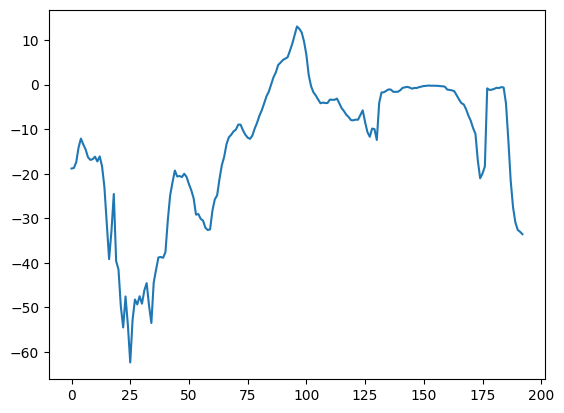

In [59]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Deficit_Percent_GDP = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Interest_Rates_df = pd.read_csv('Leading/Interest_Rates.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Deficit_Percent_GDP.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM InterestRates
JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
WHERE InterestRates.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Fisical_Stress_Index = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Fisical_Stress_Index

Fisical_Stress_Index = Fisical_Stress_Index.loc[:, ~Fisical_Stress_Index.columns.duplicated()]

# Rename columns to growth rate versions
Fisical_Stress_Index.columns = [
    'Date',
    'Interest_Rates',
    'Deficit_Percent_GDP'
]

Fisical_Stress_Index['Fisical_Stress_Index']= Fisical_Stress_Index['Interest_Rates'] * Fisical_Stress_Index['Deficit_Percent_GDP'].round(1)

Fisical_Stress_Index['Fisical_Stress_Index'].plot()

### Inflation Gap

<Axes: >

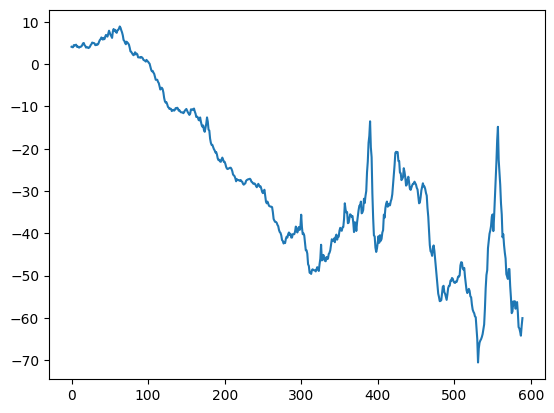

In [60]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM CPI
JOIN PPI ON CPI.observation_date = PPI.observation_date
WHERE CPI.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Inflation_Gap = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Inflation_Gap

Inflation_Gap = Inflation_Gap.loc[:, ~Inflation_Gap.columns.duplicated()]

# Rename columns to growth rate versions
Inflation_Gap.columns = [
    'Date',
    'CPI_Inflation_Rate',
    'PPI_Inflation_Rate'
]

Inflation_Gap['Inflation_Gap']= Inflation_Gap['PPI_Inflation_Rate'] - Inflation_Gap['CPI_Inflation_Rate'].round(2)

Inflation_Gap['Inflation_Gap'].plot()

### Jobs momentum



<Axes: >

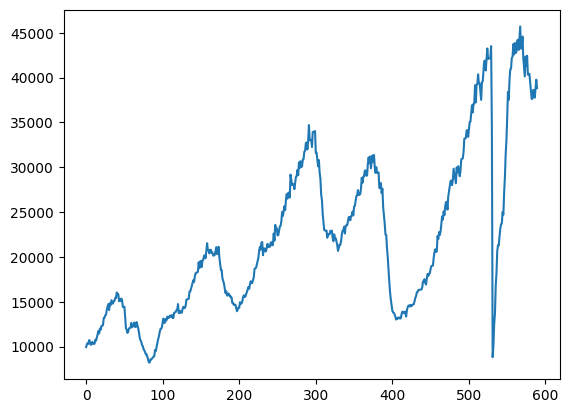

In [61]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Total_Jobs_df = pd.read_csv('Leading/Jobs_Added.csv')
PPI_Inflation_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('Unemployment', conn, index=False, if_exists='replace')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Jobs
JOIN Unemployment ON Jobs.observation_date = Unemployment.observation_date
WHERE Jobs.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Jobs_Momentum = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Jobs_Momentum

Jobs_Momentum = Jobs_Momentum.loc[:, ~Jobs_Momentum.columns.duplicated()]

# Rename columns to growth rate versions
Jobs_Momentum.columns = [
    'Date',
    'Total_Jobs',
    'Unemploymeny_Rate'
]

Jobs_Momentum['Job_Momentum']= Jobs_Momentum['Total_Jobs'] / Jobs_Momentum['Unemploymeny_Rate'].round(2)

Jobs_Momentum['Job_Momentum'].plot()

### Inventory-to-Sales Ratio

<Axes: >

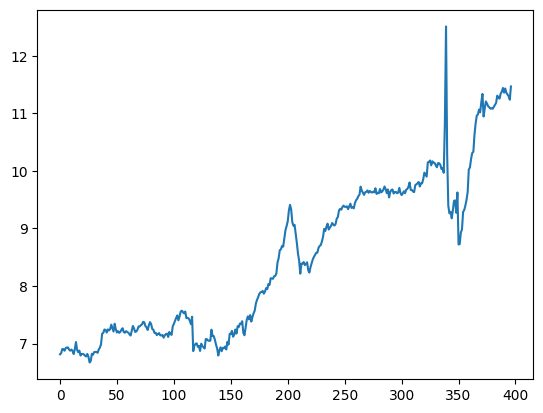

In [62]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Sales', conn, index=False, if_exists='replace')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Inventories
JOIN Sales ON Inventories.observation_date = Sales.observation_date

"""

# Execute the query and load results into a DataFrame
Inventories_to_Sales_Ratio = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Inventories_to_Sales_Ratio

Inventories_to_Sales_Ratio = Inventories_to_Sales_Ratio.loc[:, ~Inventories_to_Sales_Ratio.columns.duplicated()]

# Rename columns to growth rate versions
Inventories_to_Sales_Ratio.columns = [
    'Date',
    'Business_Inventories',
    'Retail_Sales'
]

Inventories_to_Sales_Ratio['Inventories_to_Sales_Ratio']= Inventories_to_Sales_Ratio['Business_Inventories'] / Inventories_to_Sales_Ratio['Retail_Sales'].round(2)

Inventories_to_Sales_Ratio['Inventories_to_Sales_Ratio'].plot()